## TEST DATA

In [1]:
import os
import json
import pandas as pd


json_dir = r"C:\Users\gowth\Desktop\B27_DS\Cricket Insights\tests_json"


json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]


all_deliveries = []


for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        
        city = data['info'].get('city', 'Unknown')
        dates = data['info']['dates'][0] 
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        if 'result' in data['info']['outcome']:
            result = data['info']['outcome']['result']
        elif 'winner' in data['info']['outcome']:
            result = data['info']['outcome']['winner']
        
        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]  
        
        
        if 'innings' in data:
            for inning in data['innings']:
                team_name = inning['team']
                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']
                        if 'deliveries' in over_data:
                            for delivery in over_data['deliveries']:
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']
                                
                                
                                all_deliveries.append({
                                    'city': city,
                                    'date': dates,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'result': result,
                                    'player_of_match': player_of_match,
                                    'team': team_name,
                                    'over': over_number,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total
                                })


df = pd.DataFrame(all_deliveries)


print(df.head())

    city        date                             event_name match_type  \
0  Perth  2016-11-03  South Africa in Australia Test Series       Test   
1  Perth  2016-11-03  South Africa in Australia Test Series       Test   
2  Perth  2016-11-03  South Africa in Australia Test Series       Test   
3  Perth  2016-11-03  South Africa in Australia Test Series       Test   
4  Perth  2016-11-03  South Africa in Australia Test Series       Test   

         result player_of_match          team  over   batter    bowler  \
0  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
1  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
2  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
3  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
4  South Africa        K Rabada  South Africa     0  HM Amla  MA Starc   

  non_striker  runs_batter  runs_extras  runs_total  
0     D Elgar            0            0           0  
1 

In [2]:
df.head()

,city,date,event_name,match_type,result,player_of_match,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total
0,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
1,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
2,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
3,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
4,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,HM Amla,MA Starc,D Elgar,0,0,0


In [5]:
df.isnull().sum()

city               0
date               0
event_name         0
match_type         0
result             0
player_of_match    0
team               0
over               0
batter             0
bowler             0
non_striker        0
runs_batter        0
runs_extras        0
runs_total         0
dtype: int64

In [3]:
df.to_csv("cricket_data_test.csv", index= False)

In [3]:
import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="root",    
    password="root",
    database="cricket"
)

mycursor = mydb.cursor()

create_table_query = """
CREATE TABLE IF NOT EXISTS tests (
    id INT AUTO_INCREMENT PRIMARY KEY,
    city VARCHAR(255),
    date DATE,
    event_name VARCHAR(255),
    match_type VARCHAR(255),
    result VARCHAR(255),
    player_of_match VARCHAR(255),
    team VARCHAR(255),
    `over` INT,
    batter VARCHAR(255),
    bowler VARCHAR(255),
    non_striker VARCHAR(255),
    runs_batter INT,
    runs_extras INT,
    runs_total INT
)
"""

mycursor.execute(create_table_query)
mydb.commit()
print("Table created successfully")

Table created successfully


In [ ]:
insert_query ="""INSERT INTO tests (city, date, event_name, match_type, result, player_of_match, team, `over`, batter, bowler, non_striker, runs_batter, runs_extras, runs_total)
VALUES 
(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)"""

for index, row in df.iterrows():
    values = tuple(row)
    mycursor.execute(insert_query, values)
    mydb.commit()
print("Data inserted successfully")

mycursor.close()
mydb.close()

## IPL DATA

In [36]:
import os
import json
import pandas as pd


json_dir = r"C:\Users\gowth\Desktop\B27_DS\Cricket Insights\ipl_json"


json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]


all_deliveries = []


for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        
        city = data['info'].get('city', 'Unknown')
        dates = data['info']['dates'][0] 
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        winner = data['info']['outcome'].get('winner', 'Unknown')
        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]  
        
        
        if 'innings' in data:
            for inning in data['innings']:
                team_name = inning['team']
                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']
                        if 'deliveries' in over_data:
                            for delivery in over_data['deliveries']:
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']
                                
                                
                                all_deliveries.append({
                                    'city': city,
                                    'date': dates,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'winner': winner,
                                    'player_of_match': player_of_match,
                                    'team': team_name,
                                    'over': over_number,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total
                                })


df = pd.DataFrame(all_deliveries)


print(df.head())

        city        date             event_name match_type  \
0  Hyderabad  2017-04-05  Indian Premier League        T20   
1  Hyderabad  2017-04-05  Indian Premier League        T20   
2  Hyderabad  2017-04-05  Indian Premier League        T20   
3  Hyderabad  2017-04-05  Indian Premier League        T20   
4  Hyderabad  2017-04-05  Indian Premier League        T20   

                winner player_of_match                 team  over     batter  \
0  Sunrisers Hyderabad    Yuvraj Singh  Sunrisers Hyderabad     0  DA Warner   
1  Sunrisers Hyderabad    Yuvraj Singh  Sunrisers Hyderabad     0  DA Warner   
2  Sunrisers Hyderabad    Yuvraj Singh  Sunrisers Hyderabad     0  DA Warner   
3  Sunrisers Hyderabad    Yuvraj Singh  Sunrisers Hyderabad     0  DA Warner   
4  Sunrisers Hyderabad    Yuvraj Singh  Sunrisers Hyderabad     0  DA Warner   

     bowler non_striker  runs_batter  runs_extras  runs_total  
0  TS Mills    S Dhawan            0            0           0  
1  TS Mills    S D

In [37]:
df.head()

,city,date,event_name,match_type,winner,player_of_match,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total
0,Hyderabad,2017-04-05,Indian Premier League,T20,Sunrisers Hyderabad,Yuvraj Singh,Sunrisers Hyderabad,0,DA Warner,TS Mills,S Dhawan,0,0,0
1,Hyderabad,2017-04-05,Indian Premier League,T20,Sunrisers Hyderabad,Yuvraj Singh,Sunrisers Hyderabad,0,DA Warner,TS Mills,S Dhawan,0,0,0
2,Hyderabad,2017-04-05,Indian Premier League,T20,Sunrisers Hyderabad,Yuvraj Singh,Sunrisers Hyderabad,0,DA Warner,TS Mills,S Dhawan,4,0,4
3,Hyderabad,2017-04-05,Indian Premier League,T20,Sunrisers Hyderabad,Yuvraj Singh,Sunrisers Hyderabad,0,DA Warner,TS Mills,S Dhawan,0,0,0
4,Hyderabad,2017-04-05,Indian Premier League,T20,Sunrisers Hyderabad,Yuvraj Singh,Sunrisers Hyderabad,0,DA Warner,TS Mills,S Dhawan,0,2,2


In [38]:
df.to_csv("cricket_data_ipl.csv", index=False)

In [24]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="cricket"
)

mycursor = mydb.cursor()

In [29]:
create_table_query = """
CREATE TABLE IF NOT EXISTS ipl (
    id INT AUTO_INCREMENT PRIMARY KEY,
    city VARCHAR(100),
    match_date DATE,
    event_name VARCHAR(255),
    match_type VARCHAR(50),
    winner VARCHAR(100),
    player_of_match VARCHAR(100),
    team VARCHAR(100),
    `over` INT,
    batter VARCHAR(100),
    bowler VARCHAR(100),
    non_striker VARCHAR(100),
    runs_batter INT,
    runs_extras INT,
    runs_total INT
);
"""

# Execute Table Creation Query
mycursor.execute(create_table_query)
mydb.commit()

In [ ]:
insert_query = """
INSERT INTO ipl (city, match_date, event_name, match_type, winner, player_of_match, team, `over`, batter, bowler, non_striker, runs_batter, runs_extras, runs_total)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)
"""

for index, row in df.iterrows():
    mycursor.execute(insert_query, tuple(row))
    mydb.commit()

print("Data inserted successfully")

mycursor.close()
mydb.close()    

## T20

In [43]:
import os
import json
import pandas as pd

# Define the directory containing the JSON files
json_dir = r"C:\Users\gowth\Desktop\B27_DS\Cricket Insights\t20s"

# List all JSON files in the directory
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

# List to store all ball-by-ball details
all_deliveries = []

# Loop through each JSON file and load its content
for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        # Extract general match information
        city = data['info'].get('city', 'Unknown')
        dates = data['info']['dates'][0]  # Assuming only one date per match
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        winner = data['info']['outcome'].get('winner', 'Unknown')
        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]  # Assuming only one player of the match
        
        # Extract ball-by-ball details
        if 'innings' in data:
            for inning in data['innings']:
                team_name = inning['team']
                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']
                        if 'deliveries' in over_data:
                            for delivery in over_data['deliveries']:
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']
                                
                                # Append ball-by-ball details to the list
                                all_deliveries.append({
                                    'city': city,
                                    'date': dates,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'winner': winner,
                                    'player_of_match': player_of_match,
                                    'team': team_name,
                                    'over': over_number,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total
                                })

# Convert the list of ball-by-ball details into a DataFrame
df = pd.DataFrame(all_deliveries)

# Display the DataFrame
print(df.head())

      city        date                          event_name match_type  \
0  Unknown  2017-02-17  Sri Lanka in Australia T20I Series        T20   
1  Unknown  2017-02-17  Sri Lanka in Australia T20I Series        T20   
2  Unknown  2017-02-17  Sri Lanka in Australia T20I Series        T20   
3  Unknown  2017-02-17  Sri Lanka in Australia T20I Series        T20   
4  Unknown  2017-02-17  Sri Lanka in Australia T20I Series        T20   

      winner player_of_match       team  over     batter      bowler  \
0  Sri Lanka   DAS Gunaratne  Australia     0   AJ Finch  SL Malinga   
1  Sri Lanka   DAS Gunaratne  Australia     0   AJ Finch  SL Malinga   
2  Sri Lanka   DAS Gunaratne  Australia     0   AJ Finch  SL Malinga   
3  Sri Lanka   DAS Gunaratne  Australia     0  M Klinger  SL Malinga   
4  Sri Lanka   DAS Gunaratne  Australia     0  M Klinger  SL Malinga   

  non_striker  runs_batter  runs_extras  runs_total  
0   M Klinger            0            0           0  
1   M Klinger       

In [44]:
df.head()

,city,date,event_name,match_type,winner,player_of_match,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total
0,Unknown,2017-02-17,Sri Lanka in Australia T20I Series,T20,Sri Lanka,DAS Gunaratne,Australia,0,AJ Finch,SL Malinga,M Klinger,0,0,0
1,Unknown,2017-02-17,Sri Lanka in Australia T20I Series,T20,Sri Lanka,DAS Gunaratne,Australia,0,AJ Finch,SL Malinga,M Klinger,0,0,0
2,Unknown,2017-02-17,Sri Lanka in Australia T20I Series,T20,Sri Lanka,DAS Gunaratne,Australia,0,AJ Finch,SL Malinga,M Klinger,1,0,1
3,Unknown,2017-02-17,Sri Lanka in Australia T20I Series,T20,Sri Lanka,DAS Gunaratne,Australia,0,M Klinger,SL Malinga,AJ Finch,2,0,2
4,Unknown,2017-02-17,Sri Lanka in Australia T20I Series,T20,Sri Lanka,DAS Gunaratne,Australia,0,M Klinger,SL Malinga,AJ Finch,0,0,0


In [45]:
df.to_csv("cricket_data_t2o.csv", index=False)


In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="cricket"
)

mycursor = mydb.cursor()

create_table_query = """
CREATE TABLE IF NOT EXISTS t20 (
    id INT AUTO_INCREMENT PRIMARY KEY,
    city VARCHAR(100),
    match_date DATE,
    event_name VARCHAR(255),
    match_type VARCHAR(50),
    winner VARCHAR(100),
    player_of_match VARCHAR(100),
    team VARCHAR(100),
    `over` INT,
    batter VARCHAR(100),
    bowler VARCHAR(100),
    non_striker VARCHAR(100),
    runs_batter INT,
    runs_extras INT,
    runs_total INT
);
"""

# Execute Table Creation Query
mycursor.execute(create_table_query)
print("Table Created Successfully")


insert_query = """
INSERT INTO t20 (city, match_date, event_name, match_type, winner, player_of_match, team, `over`, batter, bowler, non_striker, runs_batter, runs_extras, runs_total)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)
"""

for index, row in df.iterrows():
    mycursor.execute(insert_query, tuple(row))
    mydb.commit() 

print("Data Inserted Successfully")

## ODI DATA

In [34]:
import os
import json
import pandas as pd

# Define the directory containing the JSON files
json_dir = r"C:\Users\gowth\Desktop\B27_DS\Cricket Insights\odis_json"

# List all JSON files in the directory
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

# List to store all ball-by-ball details
all_deliveries = []

# Loop through each JSON file and load its content
for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        # Extract general match information
        city = data['info'].get('city', 'Unknown')
        dates = data['info']['dates'][0]  # Assuming only one date per match
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        winner = data['info']['outcome'].get('winner', 'Unknown')
        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]  # Assuming only one player of the match
        
        # Extract ball-by-ball details
        if 'innings' in data:
            for inning in data['innings']:
                team_name = inning['team']
                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']
                        if 'deliveries' in over_data:
                            for delivery in over_data['deliveries']:
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']
                                
                                # Append ball-by-ball details to the list
                                all_deliveries.append({
                                    'city': city,
                                    'date': dates,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'winner': winner,
                                    'player_of_match': player_of_match,
                                    'team': team_name,
                                    'over': over_number,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total
                                })

# Convert the list of ball-by-ball details into a DataFrame
df = pd.DataFrame(all_deliveries)

# Display the DataFrame
print(df.head())

       city        date                        event_name match_type  \
0  Brisbane  2017-01-13  Pakistan in Australia ODI Series        ODI   
1  Brisbane  2017-01-13  Pakistan in Australia ODI Series        ODI   
2  Brisbane  2017-01-13  Pakistan in Australia ODI Series        ODI   
3  Brisbane  2017-01-13  Pakistan in Australia ODI Series        ODI   
4  Brisbane  2017-01-13  Pakistan in Australia ODI Series        ODI   

      winner player_of_match       team  over     batter         bowler  \
0  Australia         MS Wade  Australia     0  DA Warner  Mohammad Amir   
1  Australia         MS Wade  Australia     0  DA Warner  Mohammad Amir   
2  Australia         MS Wade  Australia     0  DA Warner  Mohammad Amir   
3  Australia         MS Wade  Australia     0  DA Warner  Mohammad Amir   
4  Australia         MS Wade  Australia     0  DA Warner  Mohammad Amir   

  non_striker  runs_batter  runs_extras  runs_total  
0     TM Head            0            0           0  
1     TM

In [35]:
df.head()

,city,date,event_name,match_type,winner,player_of_match,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total
0,Brisbane,2017-01-13,Pakistan in Australia ODI Series,ODI,Australia,MS Wade,Australia,0,DA Warner,Mohammad Amir,TM Head,0,0,0
1,Brisbane,2017-01-13,Pakistan in Australia ODI Series,ODI,Australia,MS Wade,Australia,0,DA Warner,Mohammad Amir,TM Head,0,0,0
2,Brisbane,2017-01-13,Pakistan in Australia ODI Series,ODI,Australia,MS Wade,Australia,0,DA Warner,Mohammad Amir,TM Head,0,0,0
3,Brisbane,2017-01-13,Pakistan in Australia ODI Series,ODI,Australia,MS Wade,Australia,0,DA Warner,Mohammad Amir,TM Head,0,0,0
4,Brisbane,2017-01-13,Pakistan in Australia ODI Series,ODI,Australia,MS Wade,Australia,0,DA Warner,Mohammad Amir,TM Head,0,1,1


In [ ]:
df.to_csv("cricket_data_odi.csv", index=False)

In [3]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="cricket"
)

mycursor = mydb.cursor()

create_table_query = """
CREATE TABLE IF NOT EXISTS odi (
    id INT AUTO_INCREMENT PRIMARY KEY,
    city VARCHAR(100),
    match_date DATE,
    event_name VARCHAR(255),
    match_type VARCHAR(50),
    winner VARCHAR(100),
    player_of_match VARCHAR(100),
    team VARCHAR(100),
    `over` INT,
    batter VARCHAR(100),
    bowler VARCHAR(100),
    non_striker VARCHAR(100),
    runs_batter INT,
    runs_extras INT,
    runs_total INT
);
"""

# Execute Table Creation Query
mycursor.execute(create_table_query)
print("Table Created Successfully")

Table Created Successfully


In [ ]:

mycursor.execute(create_table_query)



insert_query = """
INSERT INTO odi (city, match_date, event_name, match_type, winner, player_of_match, team, `over`, batter, bowler, non_striker, runs_batter, runs_extras, runs_total)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)
"""

for index, row in df.iterrows():
    mycursor.execute(insert_query, tuple(row))
    mydb.commit() 

print("Data Inserted Successfully")

#### EDA - Exploratory Data Analysis

In [40]:
import warnings
warnings.filterwarnings("ignore")

### IPL Visualizations

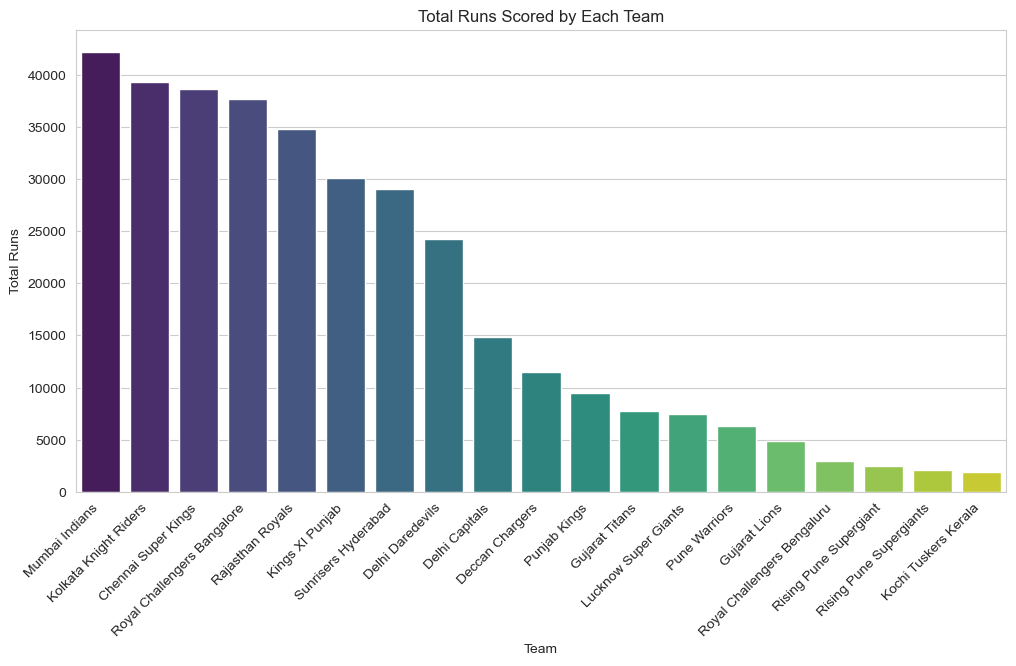

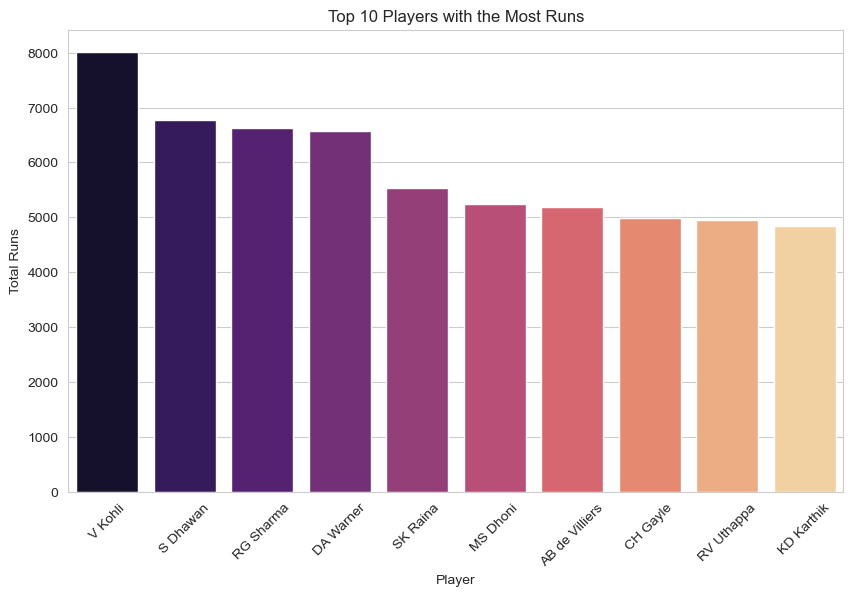

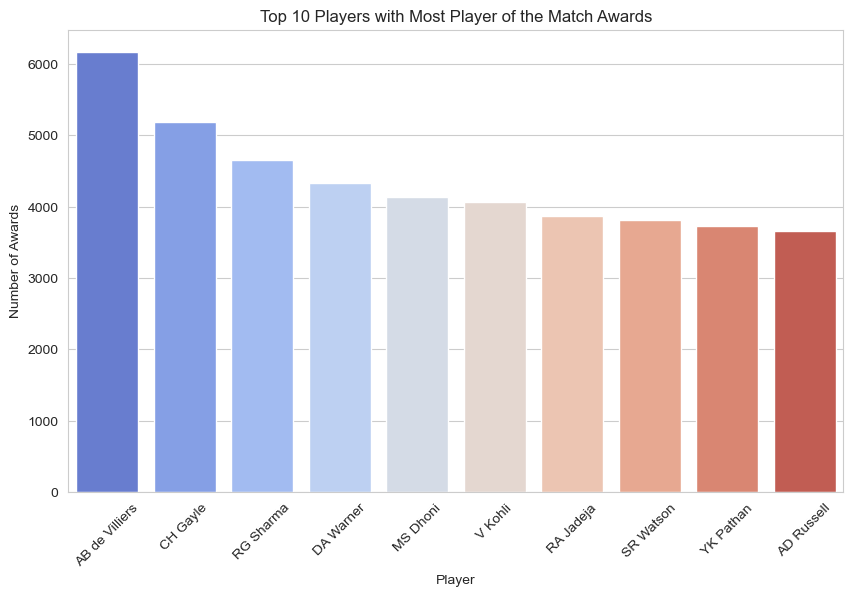

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('cricket_data_ipl.csv')

# Total Runs Scored by Each Team
team_runs = df.groupby('team')['runs_total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.index, y=team_runs.values, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.show()

# Top 10 Players with the Most Runs
top_players = df.groupby('batter')['runs_batter'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.index, y=top_players.values, palette='magma')
plt.title('Top 10 Players with the Most Runs')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

# Player of the Match Awards Distribution
player_of_match = df['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=player_of_match.index, y=player_of_match.values, palette='coolwarm')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.show()

## ODI Visualizations

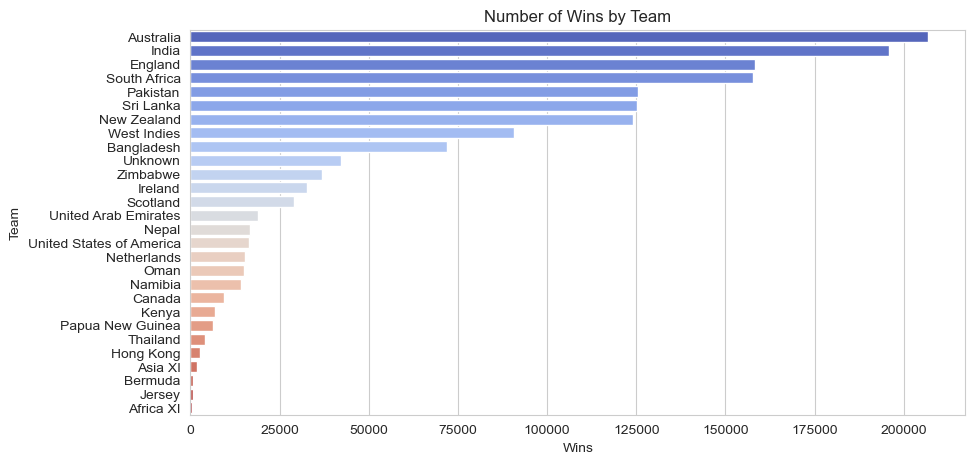

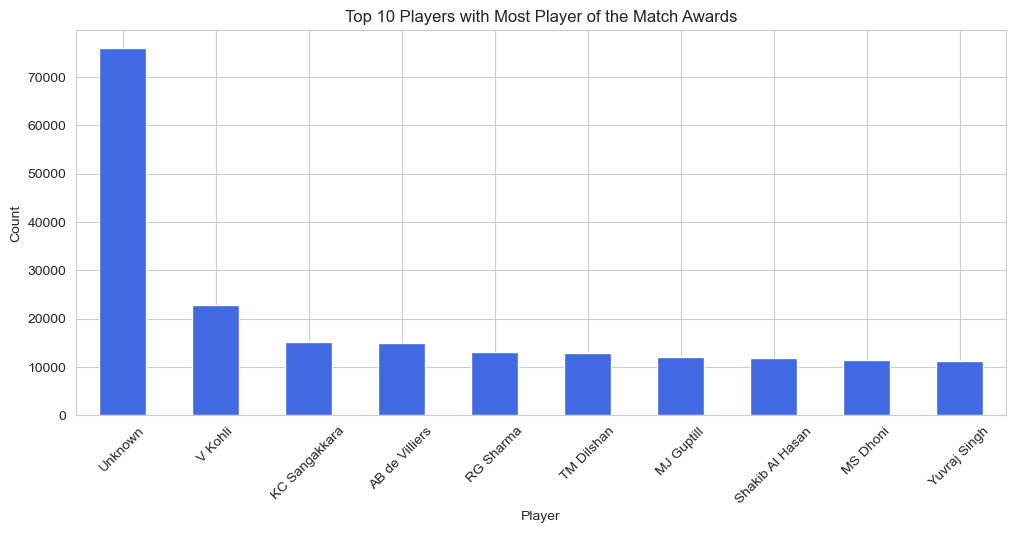

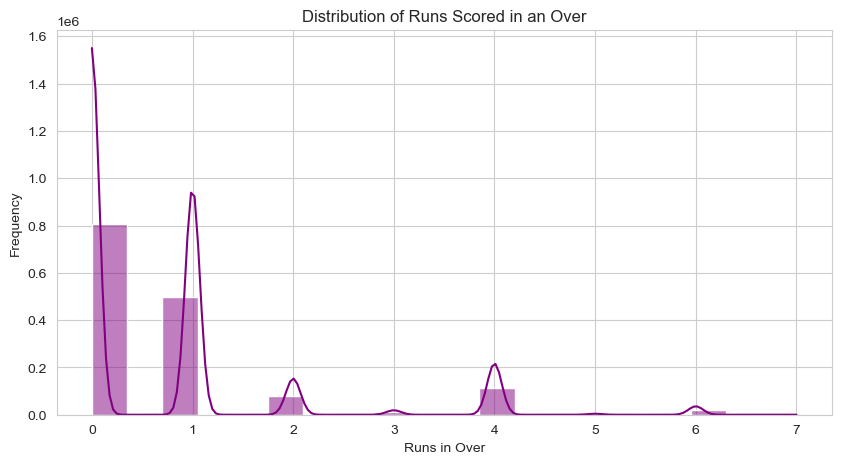

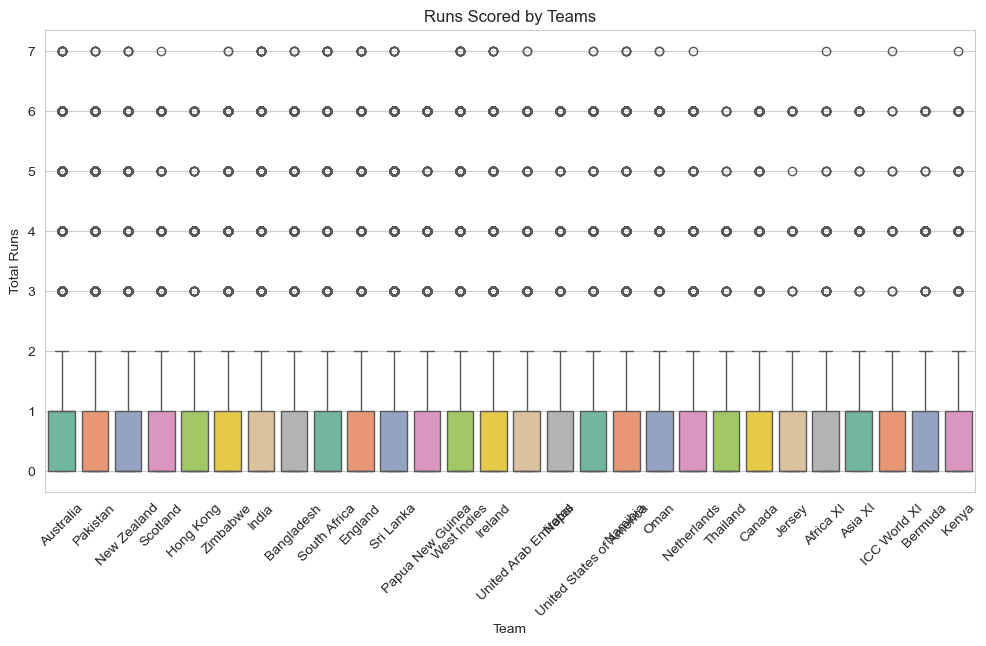

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\gowth\Desktop\B27_DS\Cricket Insights\cricket_data_odi.csv")

# Set plot style
sns.set_style("whitegrid")

# Match Wins by Team
plt.figure(figsize=(10, 5))
sns.countplot(y=df['winner'], order=df['winner'].value_counts().index, palette='coolwarm')
plt.title("Number of Wins by Team")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

# Player of the Match Awards
plt.figure(figsize=(12, 5))
df['player_of_match'].value_counts().nlargest(10).plot(kind='bar', color='royalblue')
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Player")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Runs Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['runs_total'], bins=20, kde=True, color='purple')
plt.title("Distribution of Runs Scored in an Over")
plt.xlabel("Runs in Over")
plt.ylabel("Frequency")
plt.show()

# Runs Comparison by Team
plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='runs_total', data=df, palette='Set2')
plt.title("Runs Scored by Teams")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()


## T20 Visualizations